In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from scipy.stats import randint as sp_randint, uniform as sp_uniform
import lightgbm as lgb
from xgboost import XGBRFRegressor, XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
train_events = pd.read_csv('train_events.csv')
train_events.head()

,Year,Month,ProductCategory,Sales,Avg_Sales,Event,Federal Holiday
0,2009,1,WomenClothing,1755.0,1215.466667,0.0,3.0
1,2009,1,MenClothing,524.0,1215.466667,0.0,3.0
2,2009,1,OtherClothing,936.0,1215.466667,0.0,3.0
3,2009,2,WomenClothing,1729.0,1308.433333,1.0,1.0
4,2009,2,MenClothing,496.0,1308.433333,1.0,1.0


In [5]:
train_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             180 non-null    int64  
 1   Month            180 non-null    int64  
 2   ProductCategory  180 non-null    object 
 3   Sales            180 non-null    float64
 4   Avg_Sales        180 non-null    float64
 5   Event            180 non-null    float64
 6   Federal Holiday  180 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 10.0+ KB


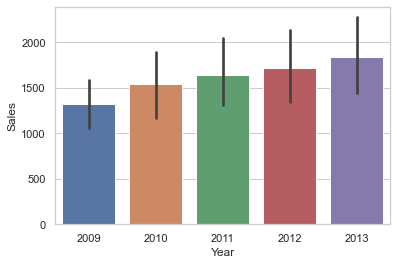

In [6]:
sns.barplot(x = 'Year', y = 'Sales', data = train_events)
plt.show()

In [7]:
test_events = pd.read_csv('test_events.csv')
test_events.head()

,Year,Month,ProductCategory,Avg_Sales,Event,Federal Holiday
0,2014,1,WomenClothing,1215.466667,0.0,3.0
1,2014,1,MenClothing,1215.466667,0.0,3.0
2,2014,1,OtherClothing,1215.466667,0.0,3.0
3,2014,2,WomenClothing,1308.433333,1.0,1.0
4,2014,2,MenClothing,1308.433333,1.0,1.0


In [8]:
test_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             36 non-null     int64  
 1   Month            36 non-null     int64  
 2   ProductCategory  36 non-null     object 
 3   Avg_Sales        36 non-null     float64
 4   Event            36 non-null     float64
 5   Federal Holiday  36 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.8+ KB


In [9]:
train_events.isna().sum().sum(), test_events.isna().sum().sum()

(0, 0)

In [10]:
eco = pd.read_excel('macro_economic.xlsx')
eco.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [11]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Year-Month                                                         96 non-null     object 
 1   Monthly Nominal GDP Index (inMillion$)                             96 non-null     float64
 2   Monthly Real GDP Index (inMillion$)                                96 non-null     float64
 3   CPI                                                                96 non-null     float64
 4   PartyInPower                                                       96 non-null     object 
 5   unemployment rate                                                  96 non-null     float64
 6   CommercialBankInterestRateonCreditCardPlans                        96 non-null     float64
 7   Finance Rate on Personal Loa

In [12]:
cat_var = eco.select_dtypes('O').columns

In [13]:
cat_var

Index(['Year-Month', 'PartyInPower',
       'AdvertisingExpenses (in Thousand Dollars)'],
      dtype='object')

In [14]:
num_var = [i for i in eco.columns if i not in cat_var]
num_var

['Monthly Nominal GDP Index (inMillion$)',
 'Monthly Real GDP Index (inMillion$)',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports']

In [15]:
for i in cat_var:
    print(eco[i].unique())
    print()

['2009 - Jan' '2009 - Feb' '2009 - Mar' '2009 - Apr' '2009 - May'
 '2009 - Jun' '2009 - Jul' '2009 - Aug' '2009 - Sep' '2009 - Oct'
 '2009 - Nov' '2009 - Dec' '2010 - Jan' '2010 - Feb' '2010 - Mar'
 '2010 - Apr' '2010 - May' '2010 - Jun' '2010 - Jul' '2010 - Aug'
 '2010 - Sep' '2010 - Oct' '2010 - Nov' '2010 - Dec' '2011 - Jan'
 '2011 - Feb' '2011 - Mar' '2011 - Apr' '2011 - May' '2011 - Jun'
 '2011 - Jul' '2011 - Aug' '2011 - Sep' '2011 - Oct' '2011 - Nov'
 '2011 - Dec' '2012 - Jan' '2012 - Feb' '2012 - Mar' '2012 - Apr'
 '2012 - May' '2012 - Jun' '2012 - Jul' '2012 - Aug' '2012 - Sep'
 '2012 - Oct' '2012 - Nov' '2012 - Dec' '2013 - Jan' '2013 - Feb'
 '2013 - Mar' '2013 - Apr' '2013 - May' '2013 - Jun' '2013 - Jul'
 '2013 - Aug' '2013 - Sep' '2013 - Oct' '2013 - Nov' '2013 - Dec'
 '2014 - Jan' '2014 - Feb' '2014 - Mar' '2014 - Apr' '2014 - May'
 '2014 - Jun' '2014 - Jul' '2014 - Aug' '2014 - Sep' '2014 - Oct'
 '2014 - Nov' '2014 - Dec' '2015 - Jan' '2015 - Feb' '2015 - Mar'
 '2015 - A

In [16]:
eco.drop('PartyInPower', axis = 1, inplace = True)

In [17]:
eco = eco.rename(columns = {'AdvertisingExpenses (in Thousand Dollars)' : 'Ad_Exp',
                           'Monthly Nominal GDP Index (inMillion$)' : 'Nominal_GDP',
                           'Monthly Real GDP Index (inMillion$)' : 'Real_GDP',
                           'unemployment rate' : 'Unemp_Rate',
                           'CommercialBankInterestRateonCreditCardPlans' : 'Rate_CreditCard',
                           'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan' : 'Rate_PersonalLoan',
                           'Earnings or wages  in dollars per hour' : 'Wages',
                           'Cotton Monthly Price - US cents per Pound(lbs)' : 'Cotton_Price',
                           'Change(in%)' : 'Change',
                           'Average upland planted(million acres)' : 'Upland_Planted',
                           'Average upland harvested(million acres)' : 'Upland_Harvested',
                           'yieldperharvested acre' : 'Yield_Harvested',
                           'Production (in  480-lb netweright in million bales)' : 'Production',
                           'Mill use  (in  480-lb netweright in million bales)' : 'Mill_Use'})
eco['Cotton_Price'] = eco['Cotton_Price'] / 100
eco.head()

,Year-Month,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Ad_Exp,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,137,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,200,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,?,0.5150,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,214,0.5678,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,?,0.6195,9.11,9.297,7.400,803,12.384,3.52,12.300


In [18]:
eco['Year-Month'][0][7:]

'Jan'

In [19]:
eco['Year'] = eco['Year-Month'].apply(lambda x: x[:4])
eco['Month'] = eco['Year-Month'].apply(lambda x: x[7:])
eco['Year'] = eco['Year'].astype('int64')
eco['Month'] = eco['Month'].map({'Jan':1,
                                'Feb':2,
                                'Mar':3,
                                'Apr':4,
                                'May':5,
                                'Jun':6,
                                'Jul':7,
                                'Aug':8,
                                'Sep':9,
                                'Oct':10,
                                'Nov':11,
                                'Dec':12})
eco.head()

,Year-Month,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Ad_Exp,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Year,Month
0,2009 - Jan,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,137,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,2009 - Feb,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,200,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,2009 - Mar,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,?,0.5150,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,2009 - Apr,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,214,0.5678,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,2009 - May,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,?,0.6195,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


In [20]:
eco.drop('Year-Month', axis = 1, inplace = True)

In [21]:
eco.columns

Index(['Nominal_GDP', 'Real_GDP', 'CPI', 'Unemp_Rate', 'Rate_CreditCard',
       'Rate_PersonalLoan', 'Wages', 'Ad_Exp', 'Cotton_Price', 'Change',
       'Upland_Planted', 'Upland_Harvested', 'Yield_Harvested', 'Production',
       'Mill_Use', 'Exports', 'Year', 'Month'],
      dtype='object')

In [22]:
eco = eco[['Year', 'Month', 'Nominal_GDP', 'Real_GDP', 'CPI', 'Unemp_Rate', 'Rate_CreditCard',
       'Rate_PersonalLoan', 'Wages', 'Ad_Exp', 'Cotton_Price', 'Change',
       'Upland_Planted', 'Upland_Harvested', 'Yield_Harvested', 'Production',
       'Mill_Use', 'Exports']]
eco.head()

,Year,Month,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Ad_Exp,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,2009,1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,137,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009,2,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,200,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009,3,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,?,0.5150,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009,4,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,214,0.5678,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009,5,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,?,0.6195,9.11,9.297,7.400,803,12.384,3.52,12.300


In [23]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96 non-null     int64  
 1   Month              96 non-null     int64  
 2   Nominal_GDP        96 non-null     float64
 3   Real_GDP           96 non-null     float64
 4   CPI                96 non-null     float64
 5   Unemp_Rate         96 non-null     float64
 6   Rate_CreditCard    96 non-null     float64
 7   Rate_PersonalLoan  96 non-null     float64
 8   Wages              96 non-null     float64
 9   Ad_Exp             96 non-null     object 
 10  Cotton_Price       96 non-null     float64
 11  Change             96 non-null     float64
 12  Upland_Planted     96 non-null     float64
 13  Upland_Harvested   96 non-null     float64
 14  Yield_Harvested    96 non-null     int64  
 15  Production         96 non-null     float64
 16  Mill_Use           96 non-nu

In [24]:
eco['Ad_Exp'].value_counts(1)

?      0.885417
221    0.010417
150    0.010417
201    0.010417
137    0.010417
200    0.010417
248    0.010417
214    0.010417
165    0.010417
116    0.010417
183    0.010417
208    0.010417
Name: Ad_Exp, dtype: float64

In [25]:
eco.drop('Ad_Exp', axis = 1, inplace = True)
eco.head()

,Year,Month,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,2009,1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009,2,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009,3,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,0.5150,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009,4,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,0.5678,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009,5,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,0.6195,9.11,9.297,7.400,803,12.384,3.52,12.300


In [26]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96 non-null     int64  
 1   Month              96 non-null     int64  
 2   Nominal_GDP        96 non-null     float64
 3   Real_GDP           96 non-null     float64
 4   CPI                96 non-null     float64
 5   Unemp_Rate         96 non-null     float64
 6   Rate_CreditCard    96 non-null     float64
 7   Rate_PersonalLoan  96 non-null     float64
 8   Wages              96 non-null     float64
 9   Cotton_Price       96 non-null     float64
 10  Change             96 non-null     float64
 11  Upland_Planted     96 non-null     float64
 12  Upland_Harvested   96 non-null     float64
 13  Yield_Harvested    96 non-null     int64  
 14  Production         96 non-null     float64
 15  Mill_Use           96 non-null     float64
 16  Exports            96 non-nu

In [27]:
eco.describe()

,Year,Month,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2012.500000,6.500000,16490.078125,15548.932194,252.372552,7.442708,12.519479,10.447604,23.793229,0.910345,0.615521,10.647698,8.851885,791.843750,14.616010,3.556104,11.061615
std,2.303316,3.470174,1427.554038,773.076316,9.290857,1.766397,0.722375,0.560651,1.147167,0.336140,6.919387,1.728418,1.102847,25.753621,2.007579,0.158263,1.710573
min,2009.000000,1.000000,14317.372922,14345.676097,233.402000,4.600000,11.820000,9.450000,21.960000,0.515000,-23.590000,8.398000,7.345000,747.000000,11.751000,3.275000,8.500000
25%,2010.750000,3.750000,15210.701514,14919.668252,242.474500,5.675000,11.950000,10.030000,22.797500,0.703775,-2.400000,9.296000,7.586000,772.750000,12.551000,3.410000,9.742500
50%,2012.500000,6.500000,16422.454368,15442.996869,254.680500,7.750000,12.220000,10.470000,23.800000,0.839050,0.350000,10.260500,9.156500,790.000000,14.959000,3.572500,10.637500
75%,2014.250000,9.250000,17772.032416,16262.237629,260.381500,9.000000,13.057500,10.940000,24.772500,0.933225,3.482500,11.412250,9.654500,807.000000,16.250000,3.675000,11.493750
max,2016.000000,12.000000,19015.393408,16918.050624,265.421000,10.000000,14.260000,11.440000,26.040000,2.296700,22.850000,14.431000,10.577000,869.000000,18.375000,4.170000,15.280000


In [28]:
train = train_events.merge(eco, how = 'left', on = ['Year', 'Month'])
test = test_events.merge(eco, how = 'left', on = ['Year', 'Month'])
display(train.head())
print(train.shape)
display(test.head())
print(test.shape)

,Year,Month,ProductCategory,Sales,Avg_Sales,Event,Federal Holiday,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,2009,1,WomenClothing,1755.0,1215.466667,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
1,2009,1,MenClothing,524.0,1215.466667,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
2,2009,1,OtherClothing,936.0,1215.466667,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
3,2009,2,WomenClothing,1729.0,1308.433333,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,2009,2,MenClothing,496.0,1308.433333,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10


(180, 22)


,Year,Month,ProductCategory,Avg_Sales,Event,Federal Holiday,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,2014,1,WomenClothing,1215.466667,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
1,2014,1,MenClothing,1215.466667,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
2,2014,1,OtherClothing,1215.466667,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
3,2014,2,WomenClothing,1308.433333,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75
4,2014,2,MenClothing,1308.433333,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75


(36, 21)


In [29]:
train.isna().sum()

Year                 0
Month                0
ProductCategory      0
Sales                0
Avg_Sales            0
Event                0
Federal Holiday      0
Nominal_GDP          0
Real_GDP             0
CPI                  0
Unemp_Rate           0
Rate_CreditCard      0
Rate_PersonalLoan    0
Wages                0
Cotton_Price         0
Change               0
Upland_Planted       0
Upland_Harvested     0
Yield_Harvested      0
Production           0
Mill_Use             0
Exports              0
dtype: int64

In [30]:
test.isna().sum()

Year                 0
Month                0
ProductCategory      0
Avg_Sales            0
Event                0
Federal Holiday      0
Nominal_GDP          0
Real_GDP             0
CPI                  0
Unemp_Rate           0
Rate_CreditCard      0
Rate_PersonalLoan    0
Wages                0
Cotton_Price         0
Change               0
Upland_Planted       0
Upland_Harvested     0
Yield_Harvested      0
Production           0
Mill_Use             0
Exports              0
dtype: int64

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               180 non-null    int64  
 1   Month              180 non-null    int64  
 2   ProductCategory    180 non-null    object 
 3   Sales              180 non-null    float64
 4   Avg_Sales          180 non-null    float64
 5   Event              180 non-null    float64
 6   Federal Holiday    180 non-null    float64
 7   Nominal_GDP        180 non-null    float64
 8   Real_GDP           180 non-null    float64
 9   CPI                180 non-null    float64
 10  Unemp_Rate         180 non-null    float64
 11  Rate_CreditCard    180 non-null    float64
 12  Rate_PersonalLoan  180 non-null    float64
 13  Wages              180 non-null    float64
 14  Cotton_Price       180 non-null    float64
 15  Change             180 non-null    float64
 16  Upland_Planted     180 non

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               36 non-null     int64  
 1   Month              36 non-null     int64  
 2   ProductCategory    36 non-null     object 
 3   Avg_Sales          36 non-null     float64
 4   Event              36 non-null     float64
 5   Federal Holiday    36 non-null     float64
 6   Nominal_GDP        36 non-null     float64
 7   Real_GDP           36 non-null     float64
 8   CPI                36 non-null     float64
 9   Unemp_Rate         36 non-null     float64
 10  Rate_CreditCard    36 non-null     float64
 11  Rate_PersonalLoan  36 non-null     float64
 12  Wages              36 non-null     float64
 13  Cotton_Price       36 non-null     float64
 14  Change             36 non-null     float64
 15  Upland_Planted     36 non-null     float64
 16  Upland_Harvested   36 non-nu

In [189]:
train.describe()

,Year,Month,Sales,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
count,180.000000,180.000000,170.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000,180.000000
mean,2011.000000,6.500000,1616.729412,0.916667,1.166667,15549.565500,15038.044855,246.965550,8.653333,12.780500,10.771833,23.043167,1.001098,1.100167,11.147183,8.971683,795.45000,14.884483,3.511850,11.743333
std,1.418158,3.461682,1158.224405,0.864411,1.070164,833.558782,434.566149,7.542282,0.903154,0.787183,0.372427,0.654946,0.391152,8.178832,1.869207,1.212023,28.25923,2.189412,0.165883,1.763997
min,2009.000000,1.000000,471.000000,0.000000,0.000000,14317.372922,14345.676097,233.402000,6.700000,11.850000,10.120000,21.960000,0.515000,-23.590000,8.668000,7.391000,747.00000,11.751000,3.275000,9.650000
25%,2010.000000,3.750000,704.000000,0.000000,0.000000,14827.477707,14713.652800,240.422000,7.875000,11.950000,10.370000,22.502500,0.816800,-2.665000,9.296000,7.582000,773.75000,12.589000,3.375000,10.387500
50%,2011.000000,6.500000,1041.000000,1.000000,1.000000,15517.929658,15007.938440,248.406000,8.900000,12.625000,10.890000,23.020000,0.898900,0.555000,10.769000,9.190000,795.00000,15.157500,3.470000,11.332500
75%,2012.000000,9.250000,2609.750000,1.000000,2.000000,16247.741634,15391.970301,253.735500,9.425000,13.477500,11.000000,23.587500,1.020025,5.347500,12.169000,10.206000,810.25000,16.551250,3.575000,12.325000
max,2013.000000,12.000000,4865.000000,3.000000,3.000000,17061.071077,15841.758762,258.504000,10.000000,14.260000,11.440000,24.300000,2.296700,22.850000,14.431000,10.577000,869.00000,18.375000,4.170000,15.280000


In [190]:
test.describe()

,Year,Month,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
count,36.0,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2014.0,6.50000,0.916667,1.166667,17427.608750,16013.417128,260.229583,6.166667,11.855833,10.194167,24.464167,0.830967,-1.938333,10.635583,8.602167,795.166667,14.364667,3.685417,9.665833
std,0.0,3.50102,0.874234,1.082326,284.959359,187.386732,1.042882,0.361742,0.061336,0.435774,0.138963,0.111561,4.529442,0.389207,1.081428,15.507602,1.740251,0.094335,0.263987
min,2014.0,1.00000,0.000000,0.000000,16955.608626,15705.972667,258.080000,5.600000,11.820000,9.570000,24.300000,0.675300,-11.740000,10.206000,7.345000,760.000000,12.234000,3.580000,9.220000
25%,2014.0,3.75000,0.000000,0.000000,17184.092769,15853.763307,259.542500,5.875000,11.827500,9.960000,24.342500,0.726200,-4.027500,10.206000,7.465000,786.000000,12.551000,3.580000,9.450000
50%,2014.0,6.50000,1.000000,1.000000,17480.172677,16040.238303,260.242500,6.200000,11.830000,10.155000,24.460000,0.873700,-1.765000,10.818000,8.594000,803.000000,14.928500,3.725000,9.697500
75%,2014.0,9.25000,1.000000,2.000000,17690.835753,16196.518717,261.112500,6.375000,11.835000,10.535000,24.535000,0.930450,1.625000,10.849250,9.692000,807.000000,15.853000,3.775000,9.800000
max,2014.0,12.00000,3.000000,3.000000,17765.337570,16243.054734,261.498000,6.700000,11.990000,10.730000,24.780000,0.969500,3.970000,11.191000,10.065000,811.000000,16.946000,3.775000,10.150000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

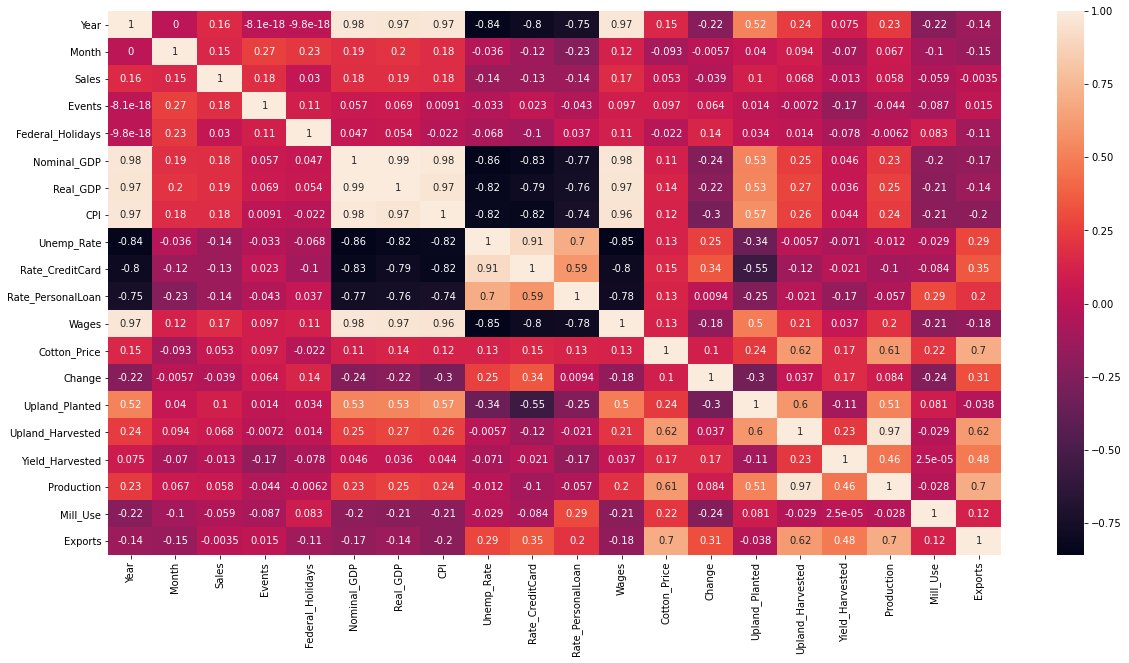

In [61]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

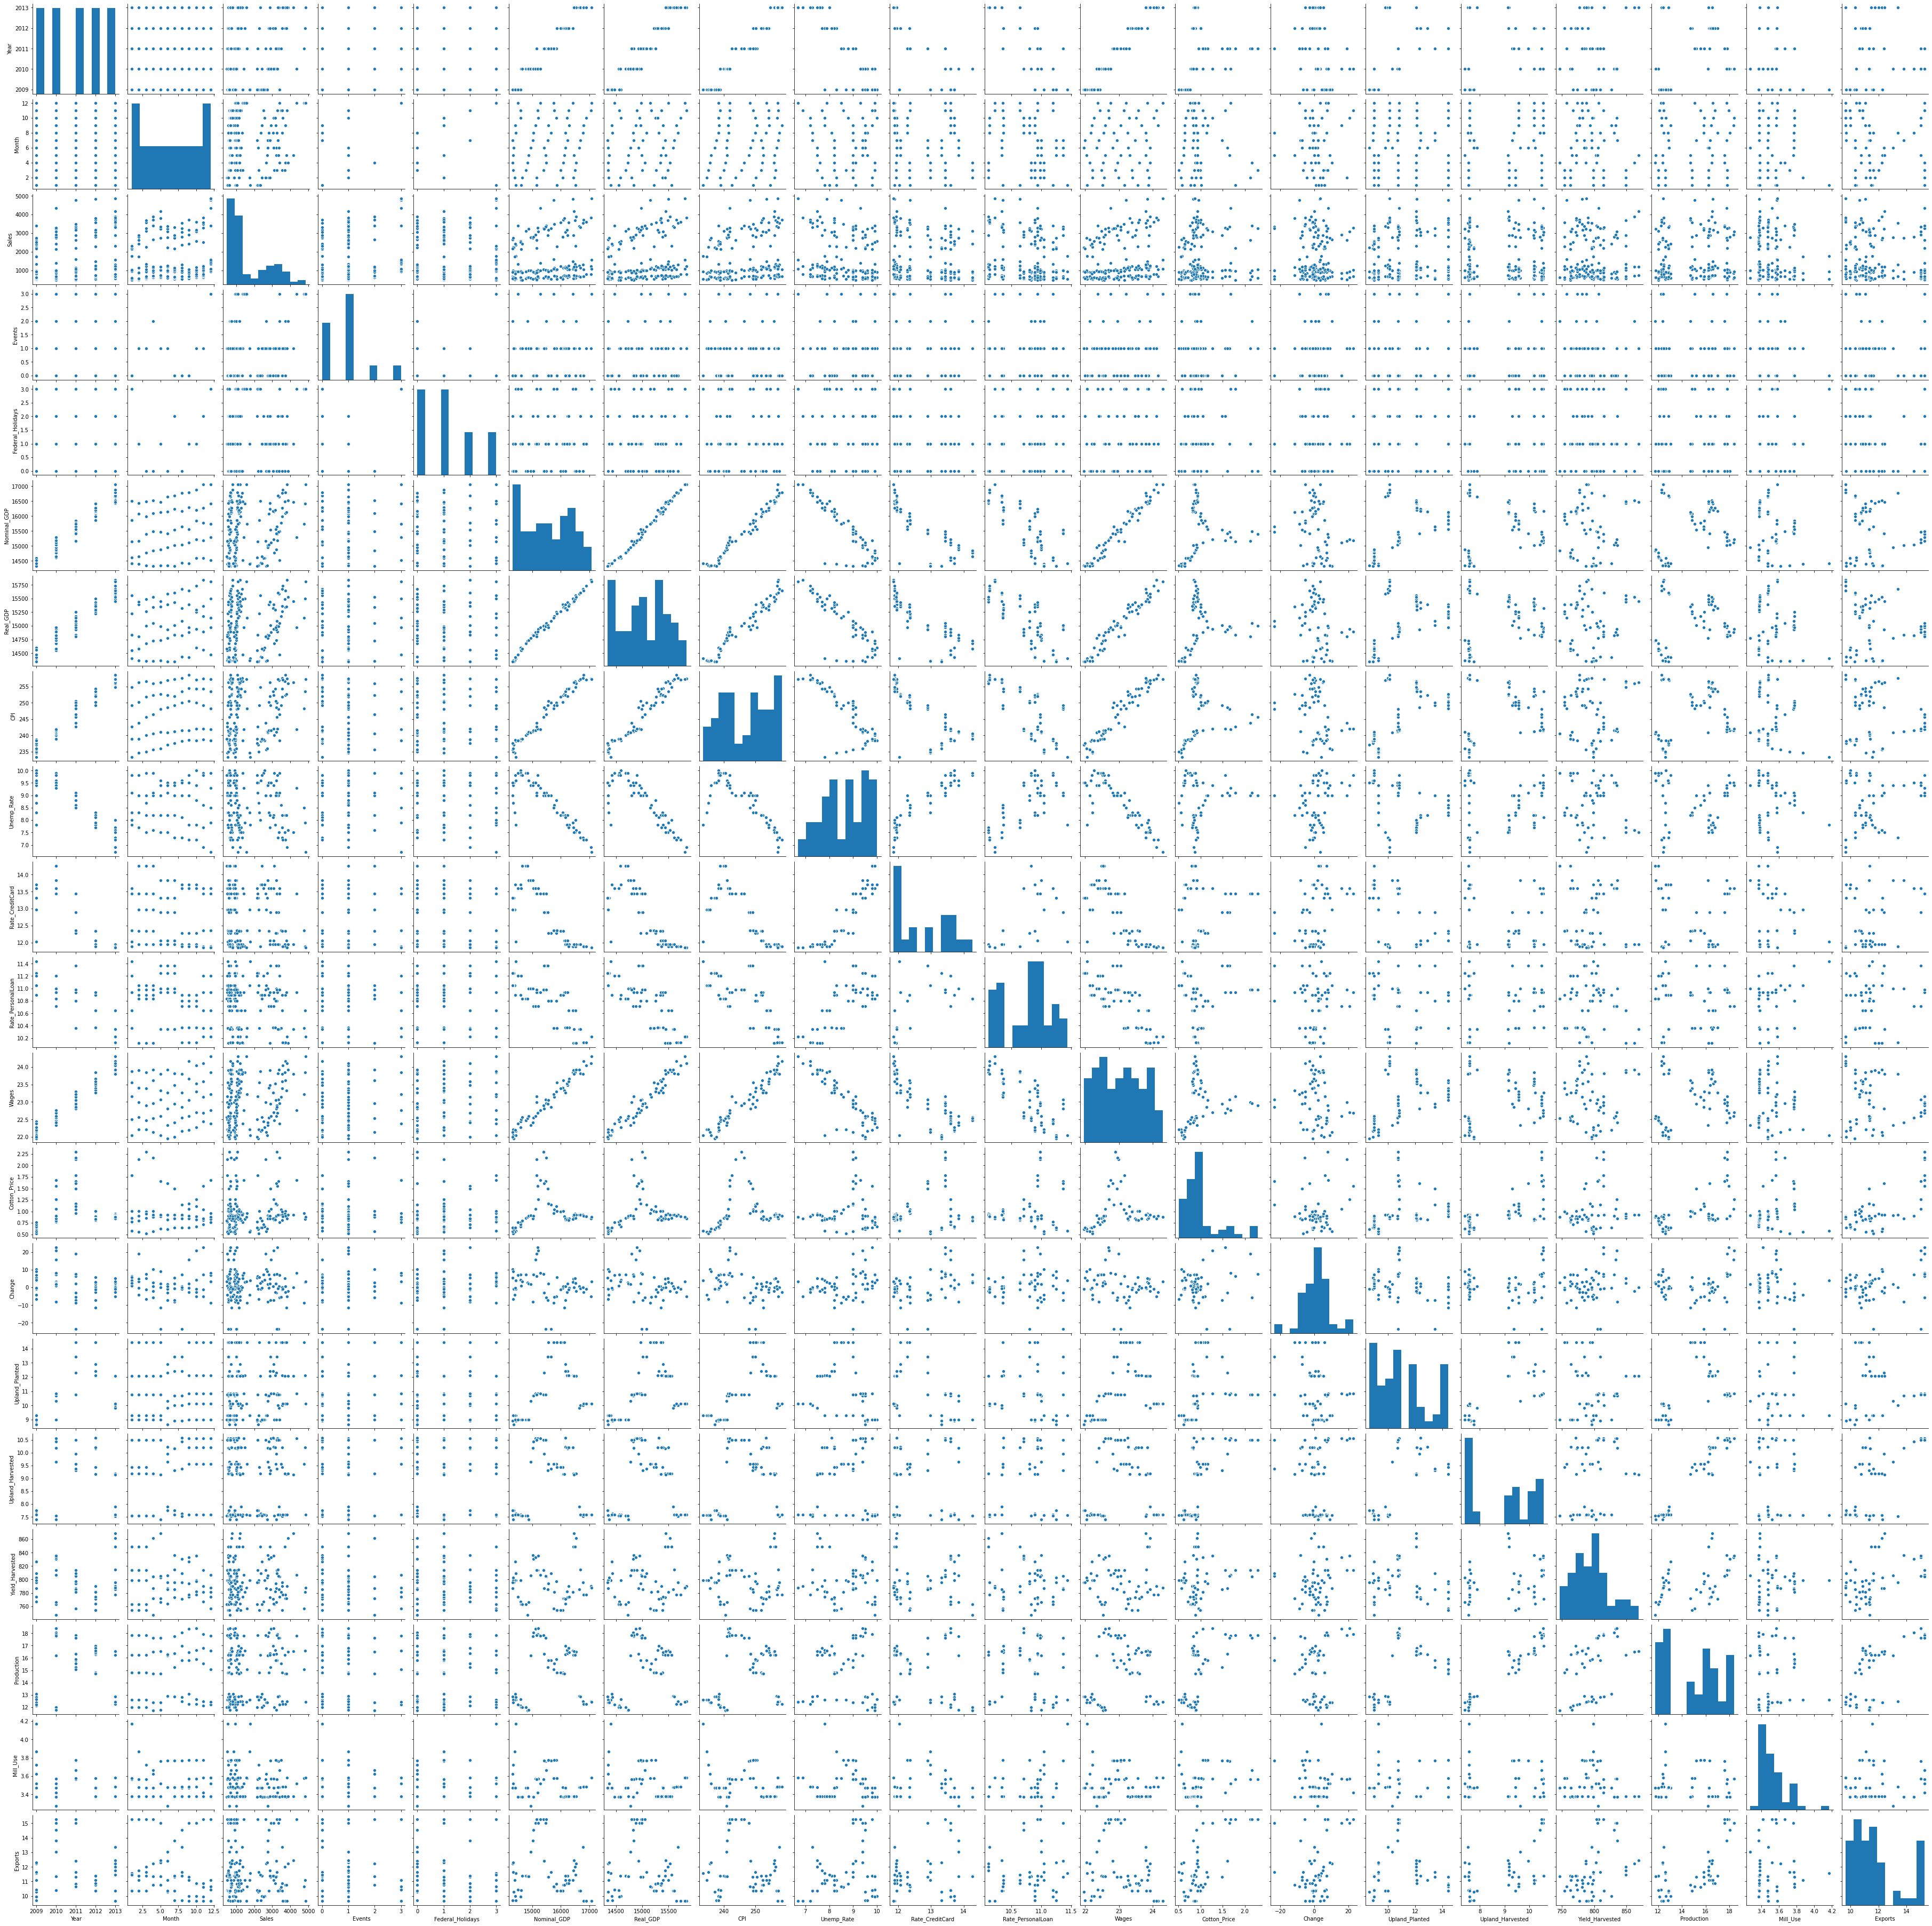

In [62]:
sns.pairplot(train)
plt.show()

In [191]:
train[train.isna().any(axis = 1)]

,Year,Month,ProductCategory,Sales,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
45,2010,4,WomenClothing,NaN,2.0,0.0,14844.531193,14724.200153,240.529,9.9,14.26,10.83,22.53,0.8809,2.68,9.008,7.552,747,11.751,3.470,11.365
47,2010,4,OtherClothing,NaN,2.0,0.0,14844.531193,14724.200153,240.529,9.9,14.26,10.83,22.53,0.8809,2.68,9.008,7.552,747,11.751,3.470,11.365
58,2010,8,MenClothing,NaN,0.0,0.0,15036.277627,14824.165770,241.569,9.5,13.59,10.71,22.55,0.9035,7.37,10.700,10.424,831,18.036,3.370,14.525
88,2011,6,MenClothing,NaN,1.0,0.0,15422.381847,14927.332731,248.505,9.1,12.89,11.37,22.81,1.6065,-2.94,12.313,9.950,787,16.323,3.770,12.400
89,2011,6,OtherClothing,NaN,1.0,0.0,15422.381847,14927.332731,248.505,9.1,12.89,11.37,22.81,1.6065,-2.94,12.313,9.950,787,16.323,3.770,12.400
99,2011,10,WomenClothing,NaN,1.0,1.0,15840.385406,15249.763484,250.051,8.8,12.28,10.80,23.30,1.1061,-5.18,14.431,9.562,797,15.871,3.775,10.825
113,2012,2,OtherClothing,NaN,1.0,1.0,16073.575390,15385.847018,250.285,8.3,12.34,10.89,23.40,1.0075,-0.36,14.426,9.444,754,14.828,3.475,10.350
130,2012,8,MenClothing,NaN,0.0,0.0,16161.118172,15317.424193,253.472,8.1,11.95,10.37,23.26,0.8440,0.51,12.400,10.577,771,16.988,3.375,11.375
132,2012,9,WomenClothing,NaN,0.0,1.0,16283.278725,15391.877310,254.554,7.8,11.95,10.37,23.67,0.8415,-0.30,12.121,10.206,774,16.452,3.375,11.075
173,2013,10,OtherClothing,NaN,1.0,1.0,16884.854816,15729.959366,257.069,7.2,11.88,10.13,24.04,0.8935,-0.82,10.136,7.582,777,12.273,3.480,9.650


In [192]:
train['Sales'] = train.groupby(['Month', 'ProductCategory'])['Sales'].transform(lambda x: x.fillna(x.median()))

In [193]:
train.isna().sum().sum()

0

In [194]:
train.to_csv('train_events_eco.csv', index = False)
test.to_csv('test_events_eco.csv', index = False)

In [160]:
train['Year'] = train['Year'] - 2014
test['Year'] = test['Year'] - 2014

In [161]:
train.head()

,Year,Month,ProductCategory,Sales,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,-5,1,WomenClothing,1755.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
1,-5,1,MenClothing,524.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
2,-5,1,OtherClothing,936.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
3,-5,2,WomenClothing,1729.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,-5,2,MenClothing,496.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10


In [162]:
test.head()

,Year,Month,ProductCategory,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,0,1,WomenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
1,0,1,MenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
2,0,1,OtherClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
3,0,2,WomenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75
4,0,2,MenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75


In [163]:
train = pd.get_dummies(train, columns = ['Month', 'ProductCategory'], drop_first = True)
test = pd.get_dummies(test, columns = ['Month', 'ProductCategory'], drop_first = True)

In [164]:
X_train = train.drop('Sales', 1)
y_train = train['Sales']
X_test = test

In [165]:
y_train_log = np.log(y_train)

In [166]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

In [167]:
X_train_scaled.head()

,Year,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,-1.414214,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
1,-1.414214,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107
2,-1.414214,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,1.414214,-0.707107
3,-1.414214,0.096674,-0.156174,-1.395944,-1.550379,-1.635694,-0.392313,0.241403,0.748985,-1.260352,-1.151090,-0.664555,-0.99312,-1.168809,0.125973,-1.051372,2.165074,-0.365719,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
4,-1.414214,0.096674,-0.156174,-1.395944,-1.550379,-1.635694,-0.392313,0.241403,0.748985,-1.260352,-1.151090,-0.664555,-0.99312,-1.168809,0.125973,-1.051372,2.165074,-0.365719,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107


In [168]:
X_test_scaled.head()

,Year,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,2.12132,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
1,2.12132,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107
2,2.12132,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,1.414214,-0.707107
3,2.12132,0.096674,-0.156174,1.779294,1.671955,1.602575,-2.168824,-1.210838,-1.835888,2.353048,-0.155355,0.281978,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
4,2.12132,0.096674,-0.156174,1.779294,1.671955,1.602575,-2.168824,-1.210838,-1.835888,2.353048,-0.155355,0.281978,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107


In [170]:
rfr = RandomForestRegressor(random_state = 0)
cbr = CatBoostRegressor(random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0)
lgbmr = lgb.LGBMRegressor(random_state = 0)
xgbr = XGBRegressor(random_state = 0)
xgbrfr = XGBRFRegressor(random_state = 0)
votreg = VotingRegressor(estimators = [('rfr', rfr), ('cbr', cbr), ('gbr', gbr), 
                                       ('lgbmr', lgbmr), ('xgbr', xgbr), ('xgbrfr', xgbrfr)])

In [174]:
rfr.fit(X_train_scaled, y_train_log)
rfr.score(X_train_scaled, y_train_log)

0.9965540246839985

In [171]:
cbr.fit(X_train_scaled, y_train_log)
cbr.score(X_train_scaled, y_train_log)

Learning rate set to 0.028763
0:	learn: 0.6619367	total: 76.7ms	remaining: 1m 16s
1:	learn: 0.6507921	total: 78.3ms	remaining: 39.1s
2:	learn: 0.6376723	total: 79.9ms	remaining: 26.5s
3:	learn: 0.6239603	total: 81.4ms	remaining: 20.3s
4:	learn: 0.6115410	total: 83.4ms	remaining: 16.6s
5:	learn: 0.5997246	total: 84.9ms	remaining: 14.1s
6:	learn: 0.5898027	total: 86.4ms	remaining: 12.3s
7:	learn: 0.5768761	total: 87.3ms	remaining: 10.8s
8:	learn: 0.5667836	total: 88.8ms	remaining: 9.78s
9:	learn: 0.5565446	total: 90.4ms	remaining: 8.95s
10:	learn: 0.5467375	total: 92.2ms	remaining: 8.29s
11:	learn: 0.5364259	total: 93.8ms	remaining: 7.72s
12:	learn: 0.5273872	total: 95.4ms	remaining: 7.24s
13:	learn: 0.5190753	total: 97ms	remaining: 6.83s
14:	learn: 0.5108226	total: 98.8ms	remaining: 6.49s
15:	learn: 0.5031674	total: 101ms	remaining: 6.19s
16:	learn: 0.4957805	total: 102ms	remaining: 5.91s
17:	learn: 0.4863582	total: 104ms	remaining: 5.66s
18:	learn: 0.4777417	total: 105ms	remaining: 5.4

164:	learn: 0.0746040	total: 289ms	remaining: 1.46s
165:	learn: 0.0742784	total: 292ms	remaining: 1.47s
166:	learn: 0.0739969	total: 293ms	remaining: 1.46s
167:	learn: 0.0736966	total: 294ms	remaining: 1.46s
168:	learn: 0.0732182	total: 296ms	remaining: 1.46s
169:	learn: 0.0727256	total: 298ms	remaining: 1.45s
170:	learn: 0.0719846	total: 299ms	remaining: 1.45s
171:	learn: 0.0713774	total: 301ms	remaining: 1.45s
172:	learn: 0.0708371	total: 302ms	remaining: 1.45s
173:	learn: 0.0702819	total: 304ms	remaining: 1.44s
174:	learn: 0.0698651	total: 305ms	remaining: 1.44s
175:	learn: 0.0691437	total: 307ms	remaining: 1.44s
176:	learn: 0.0685820	total: 309ms	remaining: 1.44s
177:	learn: 0.0678976	total: 310ms	remaining: 1.43s
178:	learn: 0.0674605	total: 312ms	remaining: 1.43s
179:	learn: 0.0670860	total: 313ms	remaining: 1.43s
180:	learn: 0.0666192	total: 315ms	remaining: 1.42s
181:	learn: 0.0660525	total: 316ms	remaining: 1.42s
182:	learn: 0.0656553	total: 318ms	remaining: 1.42s
183:	learn: 

394:	learn: 0.0290223	total: 587ms	remaining: 900ms
395:	learn: 0.0289658	total: 589ms	remaining: 898ms
396:	learn: 0.0289434	total: 591ms	remaining: 897ms
397:	learn: 0.0289209	total: 592ms	remaining: 896ms
398:	learn: 0.0288252	total: 594ms	remaining: 894ms
399:	learn: 0.0287736	total: 595ms	remaining: 893ms
400:	learn: 0.0287218	total: 597ms	remaining: 891ms
401:	learn: 0.0286983	total: 598ms	remaining: 890ms
402:	learn: 0.0286348	total: 600ms	remaining: 889ms
403:	learn: 0.0285857	total: 601ms	remaining: 887ms
404:	learn: 0.0285236	total: 603ms	remaining: 886ms
405:	learn: 0.0284880	total: 606ms	remaining: 886ms
406:	learn: 0.0284409	total: 608ms	remaining: 886ms
407:	learn: 0.0283662	total: 610ms	remaining: 885ms
408:	learn: 0.0282649	total: 612ms	remaining: 884ms
409:	learn: 0.0282071	total: 615ms	remaining: 885ms
410:	learn: 0.0281938	total: 617ms	remaining: 884ms
411:	learn: 0.0280823	total: 619ms	remaining: 884ms
412:	learn: 0.0280347	total: 622ms	remaining: 884ms
413:	learn: 

573:	learn: 0.0200714	total: 879ms	remaining: 653ms
574:	learn: 0.0200455	total: 881ms	remaining: 651ms
575:	learn: 0.0200230	total: 884ms	remaining: 651ms
576:	learn: 0.0200073	total: 887ms	remaining: 650ms
577:	learn: 0.0199704	total: 890ms	remaining: 649ms
578:	learn: 0.0199660	total: 893ms	remaining: 649ms
579:	learn: 0.0198995	total: 894ms	remaining: 648ms
580:	learn: 0.0198785	total: 896ms	remaining: 646ms
581:	learn: 0.0198266	total: 898ms	remaining: 645ms
582:	learn: 0.0197894	total: 900ms	remaining: 643ms
583:	learn: 0.0197469	total: 903ms	remaining: 643ms
584:	learn: 0.0196835	total: 905ms	remaining: 642ms
585:	learn: 0.0196248	total: 907ms	remaining: 641ms
586:	learn: 0.0195676	total: 908ms	remaining: 639ms
587:	learn: 0.0195061	total: 910ms	remaining: 638ms
588:	learn: 0.0194521	total: 912ms	remaining: 636ms
589:	learn: 0.0194430	total: 913ms	remaining: 635ms
590:	learn: 0.0194180	total: 915ms	remaining: 633ms
591:	learn: 0.0193745	total: 916ms	remaining: 631ms
592:	learn: 

741:	learn: 0.0147939	total: 1.18s	remaining: 410ms
742:	learn: 0.0147870	total: 1.18s	remaining: 408ms
743:	learn: 0.0147850	total: 1.18s	remaining: 406ms
744:	learn: 0.0147800	total: 1.18s	remaining: 405ms
745:	learn: 0.0147684	total: 1.19s	remaining: 404ms
746:	learn: 0.0147527	total: 1.19s	remaining: 402ms
747:	learn: 0.0147372	total: 1.19s	remaining: 400ms
748:	learn: 0.0146986	total: 1.19s	remaining: 399ms
749:	learn: 0.0146929	total: 1.19s	remaining: 397ms
750:	learn: 0.0146585	total: 1.19s	remaining: 395ms
751:	learn: 0.0146347	total: 1.19s	remaining: 394ms
752:	learn: 0.0146073	total: 1.2s	remaining: 392ms
753:	learn: 0.0145742	total: 1.2s	remaining: 390ms
754:	learn: 0.0145420	total: 1.2s	remaining: 389ms
755:	learn: 0.0145118	total: 1.2s	remaining: 387ms
756:	learn: 0.0144639	total: 1.2s	remaining: 385ms
757:	learn: 0.0144318	total: 1.2s	remaining: 384ms
758:	learn: 0.0144257	total: 1.2s	remaining: 382ms
759:	learn: 0.0143964	total: 1.21s	remaining: 381ms
760:	learn: 0.01439

953:	learn: 0.0106016	total: 1.47s	remaining: 71.1ms
954:	learn: 0.0105700	total: 1.48s	remaining: 69.6ms
955:	learn: 0.0105514	total: 1.48s	remaining: 68ms
956:	learn: 0.0105279	total: 1.48s	remaining: 66.5ms
957:	learn: 0.0105165	total: 1.48s	remaining: 64.9ms
958:	learn: 0.0104989	total: 1.48s	remaining: 63.4ms
959:	learn: 0.0104745	total: 1.48s	remaining: 61.8ms
960:	learn: 0.0104671	total: 1.49s	remaining: 60.3ms
961:	learn: 0.0104558	total: 1.49s	remaining: 58.8ms
962:	learn: 0.0104409	total: 1.49s	remaining: 57.2ms
963:	learn: 0.0104351	total: 1.49s	remaining: 55.7ms
964:	learn: 0.0104271	total: 1.49s	remaining: 54.1ms
965:	learn: 0.0104010	total: 1.49s	remaining: 52.6ms
966:	learn: 0.0103716	total: 1.5s	remaining: 51ms
967:	learn: 0.0103174	total: 1.5s	remaining: 49.5ms
968:	learn: 0.0103127	total: 1.5s	remaining: 48ms
969:	learn: 0.0102798	total: 1.5s	remaining: 46.4ms
970:	learn: 0.0102658	total: 1.5s	remaining: 44.9ms
971:	learn: 0.0102647	total: 1.5s	remaining: 43.3ms
972:	

0.9997914742348505

In [175]:
gbr.fit(X_train_scaled, y_train_log)
gbr.score(X_train_scaled, y_train_log)

0.9976447102949667

In [176]:
lgbmr.fit(X_train_scaled, y_train_log)
lgbmr.score(X_train_scaled, y_train_log)

0.9932121341846741

In [172]:
xgbr.fit(X_train_scaled, y_train_log)
xgbr.score(X_train_scaled, y_train_log)

0.9999945407812042

In [177]:
xgbrfr.fit(X_train_scaled, y_train_log)
xgbrfr.score(X_train_scaled, y_train_log)

0.9954463714079493

In [178]:
votreg.fit(X_train_scaled, y_train_log)
votreg.score(X_train_scaled, y_train_log)

Learning rate set to 0.028763
0:	learn: 0.6619367	total: 5.26ms	remaining: 5.25s
1:	learn: 0.6507921	total: 7.07ms	remaining: 3.52s
2:	learn: 0.6376723	total: 8.55ms	remaining: 2.84s
3:	learn: 0.6239603	total: 10.1ms	remaining: 2.52s
4:	learn: 0.6115410	total: 11.5ms	remaining: 2.29s
5:	learn: 0.5997246	total: 13ms	remaining: 2.15s
6:	learn: 0.5898027	total: 14.5ms	remaining: 2.05s
7:	learn: 0.5768761	total: 15.3ms	remaining: 1.9s
8:	learn: 0.5667836	total: 16.6ms	remaining: 1.83s
9:	learn: 0.5565446	total: 18ms	remaining: 1.78s
10:	learn: 0.5467375	total: 19.5ms	remaining: 1.75s
11:	learn: 0.5364259	total: 20.9ms	remaining: 1.72s
12:	learn: 0.5273872	total: 22.4ms	remaining: 1.7s
13:	learn: 0.5190753	total: 23.9ms	remaining: 1.68s
14:	learn: 0.5108226	total: 25.3ms	remaining: 1.66s
15:	learn: 0.5031674	total: 26.8ms	remaining: 1.65s
16:	learn: 0.4957805	total: 28.3ms	remaining: 1.64s
17:	learn: 0.4863582	total: 29.8ms	remaining: 1.63s
18:	learn: 0.4777417	total: 31.3ms	remaining: 1.61

217:	learn: 0.0522991	total: 301ms	remaining: 1.08s
218:	learn: 0.0520135	total: 303ms	remaining: 1.08s
219:	learn: 0.0517737	total: 304ms	remaining: 1.08s
220:	learn: 0.0514647	total: 306ms	remaining: 1.08s
221:	learn: 0.0512521	total: 307ms	remaining: 1.08s
222:	learn: 0.0510606	total: 309ms	remaining: 1.07s
223:	learn: 0.0507852	total: 310ms	remaining: 1.07s
224:	learn: 0.0505896	total: 312ms	remaining: 1.07s
225:	learn: 0.0503137	total: 313ms	remaining: 1.07s
226:	learn: 0.0501060	total: 315ms	remaining: 1.07s
227:	learn: 0.0498208	total: 316ms	remaining: 1.07s
228:	learn: 0.0495121	total: 318ms	remaining: 1.07s
229:	learn: 0.0493069	total: 321ms	remaining: 1.07s
230:	learn: 0.0490202	total: 322ms	remaining: 1.07s
231:	learn: 0.0487787	total: 324ms	remaining: 1.07s
232:	learn: 0.0485334	total: 325ms	remaining: 1.07s
233:	learn: 0.0482388	total: 327ms	remaining: 1.07s
234:	learn: 0.0480079	total: 328ms	remaining: 1.07s
235:	learn: 0.0478370	total: 330ms	remaining: 1.07s
236:	learn: 

434:	learn: 0.0268239	total: 598ms	remaining: 776ms
435:	learn: 0.0267324	total: 600ms	remaining: 776ms
436:	learn: 0.0266583	total: 602ms	remaining: 776ms
437:	learn: 0.0265865	total: 604ms	remaining: 775ms
438:	learn: 0.0265769	total: 606ms	remaining: 775ms
439:	learn: 0.0265606	total: 610ms	remaining: 776ms
440:	learn: 0.0264884	total: 614ms	remaining: 778ms
441:	learn: 0.0264394	total: 619ms	remaining: 781ms
442:	learn: 0.0264188	total: 620ms	remaining: 780ms
443:	learn: 0.0264076	total: 622ms	remaining: 779ms
444:	learn: 0.0263600	total: 623ms	remaining: 778ms
445:	learn: 0.0262958	total: 625ms	remaining: 776ms
446:	learn: 0.0262141	total: 627ms	remaining: 775ms
447:	learn: 0.0261676	total: 628ms	remaining: 774ms
448:	learn: 0.0261310	total: 630ms	remaining: 773ms
449:	learn: 0.0260667	total: 631ms	remaining: 771ms
450:	learn: 0.0260073	total: 633ms	remaining: 770ms
451:	learn: 0.0259243	total: 634ms	remaining: 769ms
452:	learn: 0.0258272	total: 636ms	remaining: 768ms
453:	learn: 

650:	learn: 0.0173843	total: 1.02s	remaining: 549ms
651:	learn: 0.0173387	total: 1.02s	remaining: 547ms
652:	learn: 0.0172979	total: 1.03s	remaining: 546ms
653:	learn: 0.0172389	total: 1.03s	remaining: 544ms
654:	learn: 0.0172115	total: 1.03s	remaining: 543ms
655:	learn: 0.0172007	total: 1.03s	remaining: 541ms
656:	learn: 0.0171584	total: 1.03s	remaining: 540ms
657:	learn: 0.0171521	total: 1.04s	remaining: 539ms
658:	learn: 0.0171303	total: 1.04s	remaining: 540ms
659:	learn: 0.0170850	total: 1.05s	remaining: 539ms
660:	learn: 0.0170781	total: 1.05s	remaining: 538ms
661:	learn: 0.0170428	total: 1.05s	remaining: 536ms
662:	learn: 0.0170333	total: 1.05s	remaining: 534ms
663:	learn: 0.0169949	total: 1.06s	remaining: 535ms
664:	learn: 0.0169719	total: 1.06s	remaining: 533ms
665:	learn: 0.0169193	total: 1.06s	remaining: 532ms
666:	learn: 0.0168865	total: 1.06s	remaining: 530ms
667:	learn: 0.0168758	total: 1.06s	remaining: 529ms
668:	learn: 0.0168422	total: 1.06s	remaining: 527ms
669:	learn: 

862:	learn: 0.0121378	total: 1.63s	remaining: 258ms
863:	learn: 0.0121069	total: 1.63s	remaining: 257ms
864:	learn: 0.0121023	total: 1.63s	remaining: 255ms
865:	learn: 0.0120686	total: 1.63s	remaining: 253ms
866:	learn: 0.0120353	total: 1.64s	remaining: 251ms
867:	learn: 0.0120138	total: 1.64s	remaining: 249ms
868:	learn: 0.0119804	total: 1.64s	remaining: 247ms
869:	learn: 0.0119578	total: 1.64s	remaining: 246ms
870:	learn: 0.0119337	total: 1.64s	remaining: 244ms
871:	learn: 0.0119023	total: 1.65s	remaining: 242ms
872:	learn: 0.0118872	total: 1.65s	remaining: 240ms
873:	learn: 0.0118330	total: 1.65s	remaining: 238ms
874:	learn: 0.0118236	total: 1.65s	remaining: 236ms
875:	learn: 0.0118011	total: 1.65s	remaining: 234ms
876:	learn: 0.0117840	total: 1.65s	remaining: 232ms
877:	learn: 0.0117687	total: 1.66s	remaining: 230ms
878:	learn: 0.0117415	total: 1.66s	remaining: 228ms
879:	learn: 0.0116935	total: 1.66s	remaining: 226ms
880:	learn: 0.0116905	total: 1.66s	remaining: 225ms
881:	learn: 

0.9985952812508739

In [180]:
pred = votreg.predict(X_test_scaled)

In [181]:
kaggle = pd.read_csv('Kaggle_Submission_Format.csv')

In [182]:
kaggle['Sales(In ThousandDollars)'] = np.exp(pred)

In [183]:
kaggle.to_csv('Iteration_3', index = False)
kaggle.head()

,Year,Sales(In ThousandDollars)
0,1,2950.500486
1,2,669.578547
2,3,1159.547085
3,4,3297.128283
4,5,657.074155


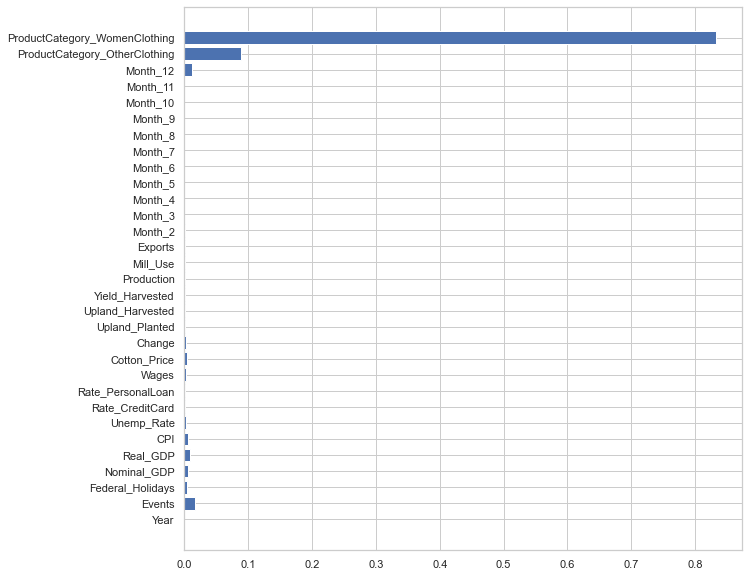

In [199]:
plt.figure(figsize = (10, 10))
plt.barh(X_train_scaled.columns, rfr.feature_importances_)
plt.show()

In [200]:
X_train_scaled.drop('Year', axis = 1, inplace = True)
X_test_scaled.drop('Year', axis = 1, inplace = True)

In [201]:
X_train_scaled.head()

,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
1,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107
2,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,1.414214,-0.707107
3,0.096674,-0.156174,-1.395944,-1.550379,-1.635694,-0.392313,0.241403,0.748985,-1.260352,-1.151090,-0.664555,-0.99312,-1.168809,0.125973,-1.051372,2.165074,-0.365719,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
4,0.096674,-0.156174,-1.395944,-1.550379,-1.635694,-0.392313,0.241403,0.748985,-1.260352,-1.151090,-0.664555,-0.99312,-1.168809,0.125973,-1.051372,2.165074,-0.365719,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107


In [202]:
X_test_scaled.head()

,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
1,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107
2,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,1.414214,-0.707107
3,0.096674,-0.156174,1.779294,1.671955,1.602575,-2.168824,-1.210838,-1.835888,2.353048,-0.155355,0.281978,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
4,0.096674,-0.156174,1.779294,1.671955,1.602575,-2.168824,-1.210838,-1.835888,2.353048,-0.155355,0.281978,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107


In [203]:
rfr = RandomForestRegressor(random_state = 0)
cbr = CatBoostRegressor(random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0)
lgbmr = lgb.LGBMRegressor(random_state = 0)
xgbr = XGBRegressor(random_state = 0)
xgbrfr = XGBRFRegressor(random_state = 0)
votreg = VotingRegressor(estimators = [('rfr', rfr), ('cbr', cbr), ('gbr', gbr), 
                                       ('lgbmr', lgbmr), ('xgbr', xgbr), ('xgbrfr', xgbrfr)])

In [204]:
rfr.fit(X_train_scaled, y_train_log)
rfr.score(X_train_scaled, y_train_log)

0.9967087564789078

In [205]:
cbr.fit(X_train_scaled, y_train_log)
cbr.score(X_train_scaled, y_train_log)

Learning rate set to 0.028763
0:	learn: 0.6634463	total: 4.47ms	remaining: 4.46s
1:	learn: 0.6497235	total: 6ms	remaining: 2.99s
2:	learn: 0.6369830	total: 7.49ms	remaining: 2.49s
3:	learn: 0.6254268	total: 8.91ms	remaining: 2.22s
4:	learn: 0.6136455	total: 10.3ms	remaining: 2.05s
5:	learn: 0.6014343	total: 11.5ms	remaining: 1.91s
6:	learn: 0.5892670	total: 12.9ms	remaining: 1.82s
7:	learn: 0.5773782	total: 14.2ms	remaining: 1.77s
8:	learn: 0.5645520	total: 16.3ms	remaining: 1.79s
9:	learn: 0.5539741	total: 17.5ms	remaining: 1.73s
10:	learn: 0.5451054	total: 18.9ms	remaining: 1.7s
11:	learn: 0.5345785	total: 20.2ms	remaining: 1.66s
12:	learn: 0.5233666	total: 21.5ms	remaining: 1.63s
13:	learn: 0.5143442	total: 22.9ms	remaining: 1.61s
14:	learn: 0.5040109	total: 24.2ms	remaining: 1.59s
15:	learn: 0.4939504	total: 25.4ms	remaining: 1.56s
16:	learn: 0.4858377	total: 26.8ms	remaining: 1.55s
17:	learn: 0.4764022	total: 28.1ms	remaining: 1.53s
18:	learn: 0.4690688	total: 29.7ms	remaining: 1.

228:	learn: 0.0481977	total: 290ms	remaining: 977ms
229:	learn: 0.0479214	total: 292ms	remaining: 977ms
230:	learn: 0.0477232	total: 293ms	remaining: 977ms
231:	learn: 0.0475043	total: 295ms	remaining: 976ms
232:	learn: 0.0473252	total: 296ms	remaining: 975ms
233:	learn: 0.0471110	total: 298ms	remaining: 974ms
234:	learn: 0.0469115	total: 299ms	remaining: 973ms
235:	learn: 0.0466711	total: 300ms	remaining: 972ms
236:	learn: 0.0463514	total: 302ms	remaining: 972ms
237:	learn: 0.0461546	total: 303ms	remaining: 971ms
238:	learn: 0.0458420	total: 305ms	remaining: 971ms
239:	learn: 0.0455936	total: 306ms	remaining: 970ms
240:	learn: 0.0453843	total: 308ms	remaining: 971ms
241:	learn: 0.0451653	total: 310ms	remaining: 970ms
242:	learn: 0.0449776	total: 311ms	remaining: 969ms
243:	learn: 0.0447336	total: 313ms	remaining: 969ms
244:	learn: 0.0445358	total: 314ms	remaining: 968ms
245:	learn: 0.0443568	total: 316ms	remaining: 970ms
246:	learn: 0.0442023	total: 318ms	remaining: 969ms
247:	learn: 

467:	learn: 0.0235393	total: 588ms	remaining: 669ms
468:	learn: 0.0234672	total: 590ms	remaining: 668ms
469:	learn: 0.0234549	total: 592ms	remaining: 667ms
470:	learn: 0.0234049	total: 593ms	remaining: 666ms
471:	learn: 0.0233942	total: 594ms	remaining: 665ms
472:	learn: 0.0233347	total: 596ms	remaining: 664ms
473:	learn: 0.0232919	total: 597ms	remaining: 663ms
474:	learn: 0.0231781	total: 599ms	remaining: 662ms
475:	learn: 0.0231118	total: 600ms	remaining: 661ms
476:	learn: 0.0230721	total: 602ms	remaining: 660ms
477:	learn: 0.0230006	total: 603ms	remaining: 659ms
478:	learn: 0.0229766	total: 605ms	remaining: 658ms
479:	learn: 0.0229260	total: 606ms	remaining: 657ms
480:	learn: 0.0229061	total: 608ms	remaining: 656ms
481:	learn: 0.0228361	total: 609ms	remaining: 655ms
482:	learn: 0.0228084	total: 610ms	remaining: 653ms
483:	learn: 0.0227489	total: 613ms	remaining: 653ms
484:	learn: 0.0226793	total: 615ms	remaining: 653ms
485:	learn: 0.0226156	total: 616ms	remaining: 652ms
486:	learn: 

670:	learn: 0.0157541	total: 884ms	remaining: 434ms
671:	learn: 0.0157400	total: 886ms	remaining: 432ms
672:	learn: 0.0157300	total: 887ms	remaining: 431ms
673:	learn: 0.0157089	total: 889ms	remaining: 430ms
674:	learn: 0.0156605	total: 890ms	remaining: 429ms
675:	learn: 0.0156153	total: 892ms	remaining: 427ms
676:	learn: 0.0156024	total: 893ms	remaining: 426ms
677:	learn: 0.0155950	total: 895ms	remaining: 425ms
678:	learn: 0.0155696	total: 897ms	remaining: 424ms
679:	learn: 0.0155461	total: 899ms	remaining: 423ms
680:	learn: 0.0155394	total: 901ms	remaining: 422ms
681:	learn: 0.0155188	total: 903ms	remaining: 421ms
682:	learn: 0.0154672	total: 904ms	remaining: 420ms
683:	learn: 0.0154315	total: 906ms	remaining: 419ms
684:	learn: 0.0154222	total: 910ms	remaining: 418ms
685:	learn: 0.0154152	total: 911ms	remaining: 417ms
686:	learn: 0.0153626	total: 912ms	remaining: 416ms
687:	learn: 0.0153049	total: 914ms	remaining: 415ms
688:	learn: 0.0152705	total: 916ms	remaining: 413ms
689:	learn: 

881:	learn: 0.0110590	total: 1.18s	remaining: 158ms
882:	learn: 0.0110417	total: 1.18s	remaining: 156ms
883:	learn: 0.0110325	total: 1.18s	remaining: 155ms
884:	learn: 0.0110059	total: 1.18s	remaining: 154ms
885:	learn: 0.0109876	total: 1.18s	remaining: 152ms
886:	learn: 0.0109606	total: 1.19s	remaining: 151ms
887:	learn: 0.0109532	total: 1.19s	remaining: 150ms
888:	learn: 0.0109354	total: 1.19s	remaining: 148ms
889:	learn: 0.0109098	total: 1.19s	remaining: 147ms
890:	learn: 0.0108719	total: 1.19s	remaining: 146ms
891:	learn: 0.0108688	total: 1.19s	remaining: 144ms
892:	learn: 0.0108476	total: 1.19s	remaining: 143ms
893:	learn: 0.0108177	total: 1.2s	remaining: 142ms
894:	learn: 0.0107929	total: 1.2s	remaining: 141ms
895:	learn: 0.0107626	total: 1.2s	remaining: 139ms
896:	learn: 0.0107215	total: 1.2s	remaining: 138ms
897:	learn: 0.0107011	total: 1.2s	remaining: 137ms
898:	learn: 0.0106946	total: 1.2s	remaining: 135ms
899:	learn: 0.0106620	total: 1.21s	remaining: 134ms
900:	learn: 0.0106

0.9998231932393397

In [206]:
gbr.fit(X_train_scaled, y_train_log)
gbr.score(X_train_scaled, y_train_log)

0.9976447102949667

In [207]:
lgbmr.fit(X_train_scaled, y_train_log)
lgbmr.score(X_train_scaled, y_train_log)

0.9932121341846741

In [208]:
xgbr.fit(X_train_scaled, y_train_log)
xgbr.score(X_train_scaled, y_train_log)

0.9999945407812042

In [209]:
xgbrfr.fit(X_train_scaled, y_train_log)
xgbrfr.score(X_train_scaled, y_train_log)

0.9956660050093991

In [210]:
votreg.fit(X_train_scaled, y_train_log)
votreg.score(X_train_scaled, y_train_log)

Learning rate set to 0.028763
0:	learn: 0.6634463	total: 1.93ms	remaining: 1.93s
1:	learn: 0.6497235	total: 3.58ms	remaining: 1.79s
2:	learn: 0.6369830	total: 4.81ms	remaining: 1.6s
3:	learn: 0.6254268	total: 6ms	remaining: 1.49s
4:	learn: 0.6136455	total: 7.56ms	remaining: 1.5s
5:	learn: 0.6014343	total: 8.88ms	remaining: 1.47s
6:	learn: 0.5892670	total: 10.1ms	remaining: 1.44s
7:	learn: 0.5773782	total: 11.5ms	remaining: 1.42s
8:	learn: 0.5645520	total: 12.8ms	remaining: 1.41s
9:	learn: 0.5539741	total: 14ms	remaining: 1.39s
10:	learn: 0.5451054	total: 15.3ms	remaining: 1.38s
11:	learn: 0.5345785	total: 16.5ms	remaining: 1.36s
12:	learn: 0.5233666	total: 17.8ms	remaining: 1.35s
13:	learn: 0.5143442	total: 19.2ms	remaining: 1.35s
14:	learn: 0.5040109	total: 20.6ms	remaining: 1.35s
15:	learn: 0.4939504	total: 21.9ms	remaining: 1.35s
16:	learn: 0.4858377	total: 23.2ms	remaining: 1.34s
17:	learn: 0.4764022	total: 24.4ms	remaining: 1.33s
18:	learn: 0.4690688	total: 25.6ms	remaining: 1.32s

206:	learn: 0.0551922	total: 281ms	remaining: 1.07s
207:	learn: 0.0549947	total: 283ms	remaining: 1.08s
208:	learn: 0.0546892	total: 284ms	remaining: 1.08s
209:	learn: 0.0543400	total: 286ms	remaining: 1.07s
210:	learn: 0.0539725	total: 287ms	remaining: 1.07s
211:	learn: 0.0536107	total: 289ms	remaining: 1.07s
212:	learn: 0.0531499	total: 291ms	remaining: 1.07s
213:	learn: 0.0527214	total: 292ms	remaining: 1.07s
214:	learn: 0.0523655	total: 293ms	remaining: 1.07s
215:	learn: 0.0519868	total: 295ms	remaining: 1.07s
216:	learn: 0.0517349	total: 296ms	remaining: 1.07s
217:	learn: 0.0514506	total: 298ms	remaining: 1.07s
218:	learn: 0.0512024	total: 300ms	remaining: 1.07s
219:	learn: 0.0510032	total: 301ms	remaining: 1.07s
220:	learn: 0.0506237	total: 303ms	remaining: 1.07s
221:	learn: 0.0501967	total: 304ms	remaining: 1.07s
222:	learn: 0.0498972	total: 306ms	remaining: 1.06s
223:	learn: 0.0496208	total: 308ms	remaining: 1.07s
224:	learn: 0.0493500	total: 309ms	remaining: 1.06s
225:	learn: 

371:	learn: 0.0295390	total: 567ms	remaining: 957ms
372:	learn: 0.0294848	total: 568ms	remaining: 955ms
373:	learn: 0.0293323	total: 570ms	remaining: 954ms
374:	learn: 0.0292044	total: 571ms	remaining: 952ms
375:	learn: 0.0291552	total: 573ms	remaining: 950ms
376:	learn: 0.0290614	total: 574ms	remaining: 949ms
377:	learn: 0.0289640	total: 576ms	remaining: 948ms
378:	learn: 0.0288477	total: 578ms	remaining: 947ms
379:	learn: 0.0287923	total: 579ms	remaining: 945ms
380:	learn: 0.0286877	total: 582ms	remaining: 945ms
381:	learn: 0.0286265	total: 583ms	remaining: 944ms
382:	learn: 0.0285266	total: 585ms	remaining: 943ms
383:	learn: 0.0284754	total: 588ms	remaining: 943ms
384:	learn: 0.0283877	total: 590ms	remaining: 942ms
385:	learn: 0.0283018	total: 599ms	remaining: 953ms
386:	learn: 0.0282634	total: 604ms	remaining: 957ms
387:	learn: 0.0282422	total: 606ms	remaining: 956ms
388:	learn: 0.0282091	total: 607ms	remaining: 954ms
389:	learn: 0.0281517	total: 608ms	remaining: 952ms
390:	learn: 

574:	learn: 0.0190150	total: 979ms	remaining: 724ms
575:	learn: 0.0189606	total: 981ms	remaining: 722ms
576:	learn: 0.0189471	total: 987ms	remaining: 723ms
577:	learn: 0.0189366	total: 995ms	remaining: 726ms
578:	learn: 0.0189172	total: 999ms	remaining: 726ms
579:	learn: 0.0188434	total: 1s	remaining: 727ms
580:	learn: 0.0188080	total: 1.01s	remaining: 726ms
581:	learn: 0.0187659	total: 1.01s	remaining: 725ms
582:	learn: 0.0187485	total: 1.01s	remaining: 723ms
583:	learn: 0.0186817	total: 1.01s	remaining: 722ms
584:	learn: 0.0186474	total: 1.01s	remaining: 719ms
585:	learn: 0.0186074	total: 1.01s	remaining: 718ms
586:	learn: 0.0185897	total: 1.02s	remaining: 716ms
587:	learn: 0.0185580	total: 1.02s	remaining: 714ms
588:	learn: 0.0185170	total: 1.02s	remaining: 712ms
589:	learn: 0.0184601	total: 1.02s	remaining: 711ms
590:	learn: 0.0184433	total: 1.02s	remaining: 709ms
591:	learn: 0.0183805	total: 1.03s	remaining: 707ms
592:	learn: 0.0183431	total: 1.03s	remaining: 705ms
593:	learn: 0.0

793:	learn: 0.0128668	total: 1.41s	remaining: 365ms
794:	learn: 0.0128374	total: 1.41s	remaining: 363ms
795:	learn: 0.0128080	total: 1.41s	remaining: 361ms
796:	learn: 0.0127929	total: 1.41s	remaining: 360ms
797:	learn: 0.0127698	total: 1.41s	remaining: 358ms
798:	learn: 0.0127533	total: 1.42s	remaining: 356ms
799:	learn: 0.0127268	total: 1.42s	remaining: 354ms
800:	learn: 0.0126933	total: 1.42s	remaining: 352ms
801:	learn: 0.0126580	total: 1.42s	remaining: 350ms
802:	learn: 0.0126484	total: 1.42s	remaining: 349ms
803:	learn: 0.0126254	total: 1.42s	remaining: 347ms
804:	learn: 0.0126071	total: 1.42s	remaining: 345ms
805:	learn: 0.0125821	total: 1.43s	remaining: 343ms
806:	learn: 0.0125580	total: 1.43s	remaining: 341ms
807:	learn: 0.0125158	total: 1.43s	remaining: 340ms
808:	learn: 0.0125126	total: 1.43s	remaining: 338ms
809:	learn: 0.0124605	total: 1.43s	remaining: 336ms
810:	learn: 0.0124483	total: 1.43s	remaining: 334ms
811:	learn: 0.0124172	total: 1.43s	remaining: 332ms
812:	learn: 

0.9986358763179822

In [211]:
pred = votreg.predict(X_test_scaled)

In [212]:
kaggle = pd.read_csv('Kaggle_Submission_Format.csv')

In [213]:
kaggle['Sales(In ThousandDollars)'] = np.exp(pred)

In [214]:
kaggle.to_csv('Iteration_3a_without_years', index = False)
kaggle.head()

,Year,Sales(In ThousandDollars)
0,1,2930.142617
1,2,670.187340
2,3,1154.573548
3,4,3285.283482
4,5,654.023013


In [216]:
# RMSE Increases by 4 points by excluding year variable